In [1]:
import function as f

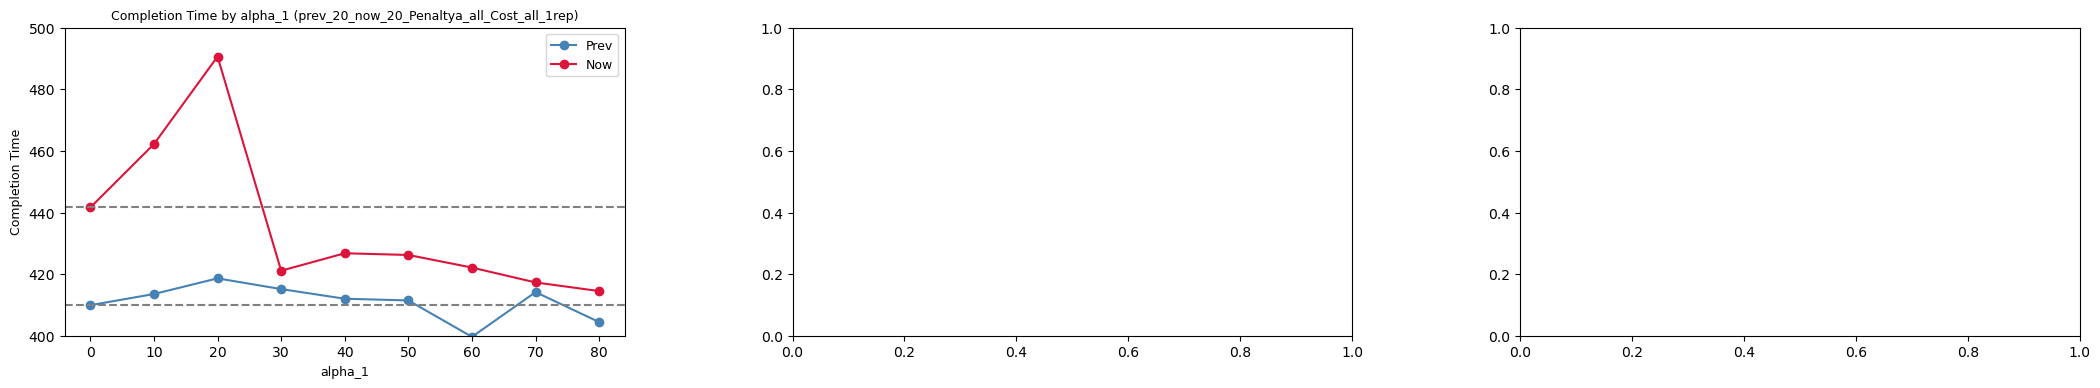

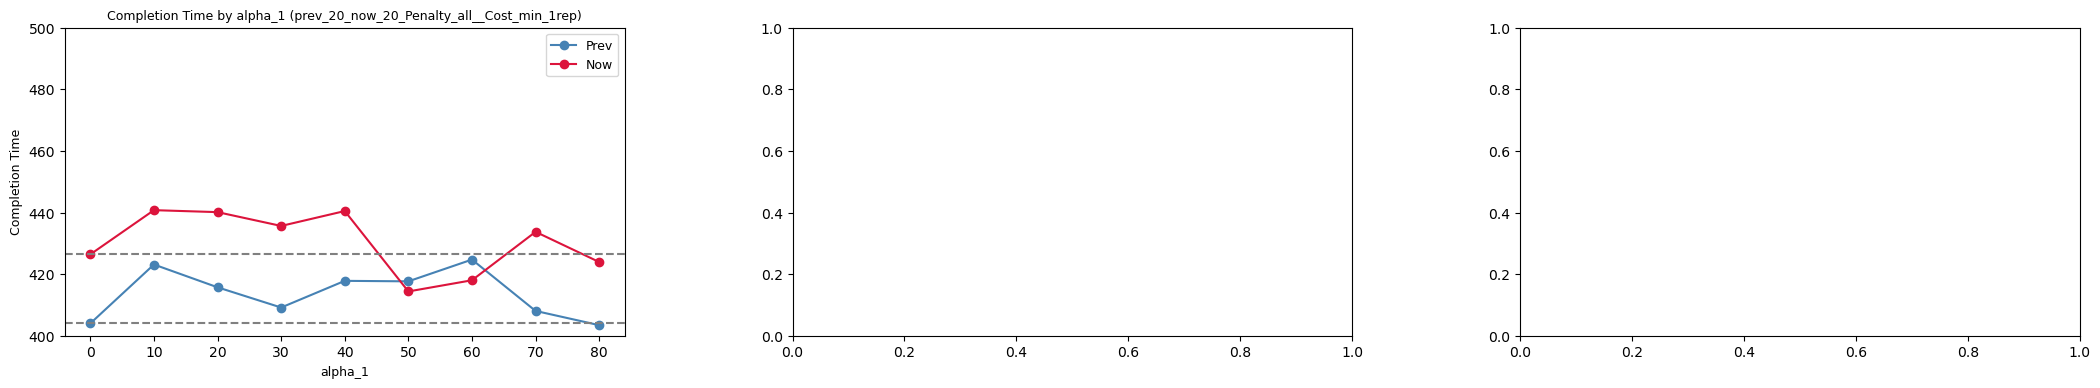

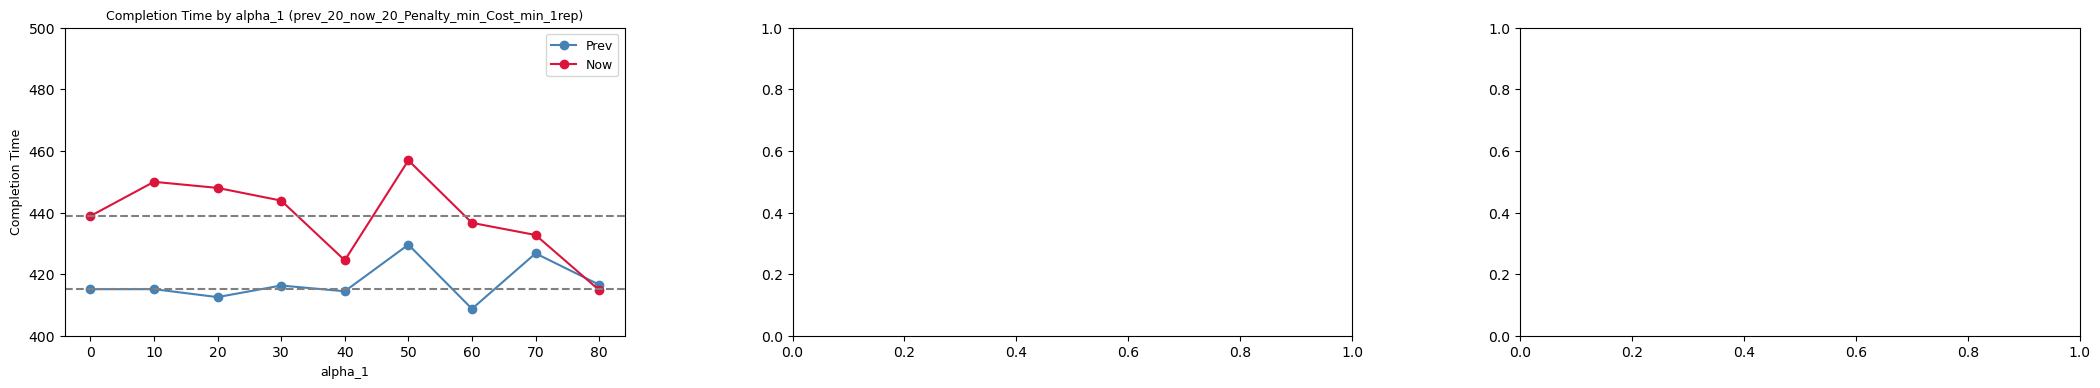

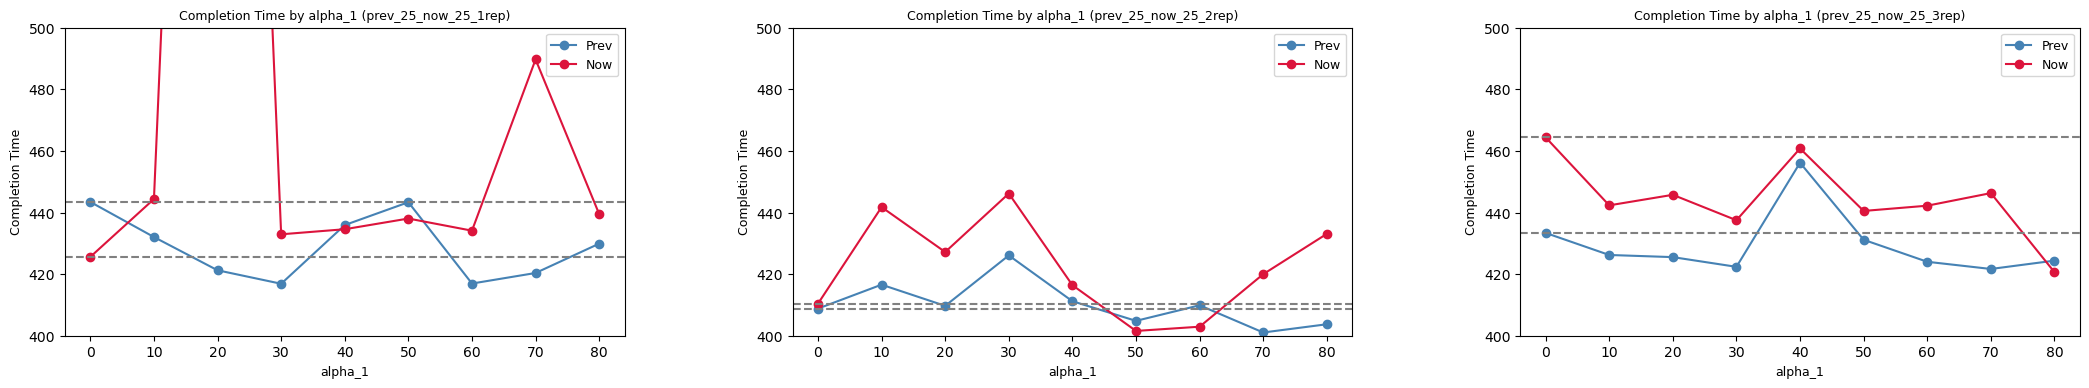

In [2]:
directory_path ='../Simulation/Assets/Results/Congestion'

x_label = "alpha_1"
y_label = "Completion Time"
title = "Completion Time by alpha_1"
col_num = 3
y_ilm = (400, 500)
f.create_subplot_completion(directory_path, x_label, y_label, title, col_num, y_ilm, (26,4))